In [1]:
import numpy as np 
import pandas as pd 


import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns  

# 1. Introduction to Time-Series Analysis
# A time-series data is a series of data points or observations recorded at different or regular time intervals.The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
# Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.

# Components of a Time-Series¶
# Trend - The trend shows a general direction of the time series data over a long period of time. 
# Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. 
# Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. 

In [2]:
df = pd.read_csv(r"C:\Users\FAUZAN\OneDrive\Desktop\time series analysis\AirPassengers.csv")

# Time Series terminology 


# 1 Dependence- It refers to the association of two observations of the same variable at prior time periods.

# 2 Stationarity- It shows the mean value of the series that remains constant over the time period. 

# 3 Differencing- Differencing is used to make the series stationary and to control the auto-correlations. 

# 5 Exponential Smoothing - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['Date','Number of Passengers']    
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')


In [5]:
df.head()


,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


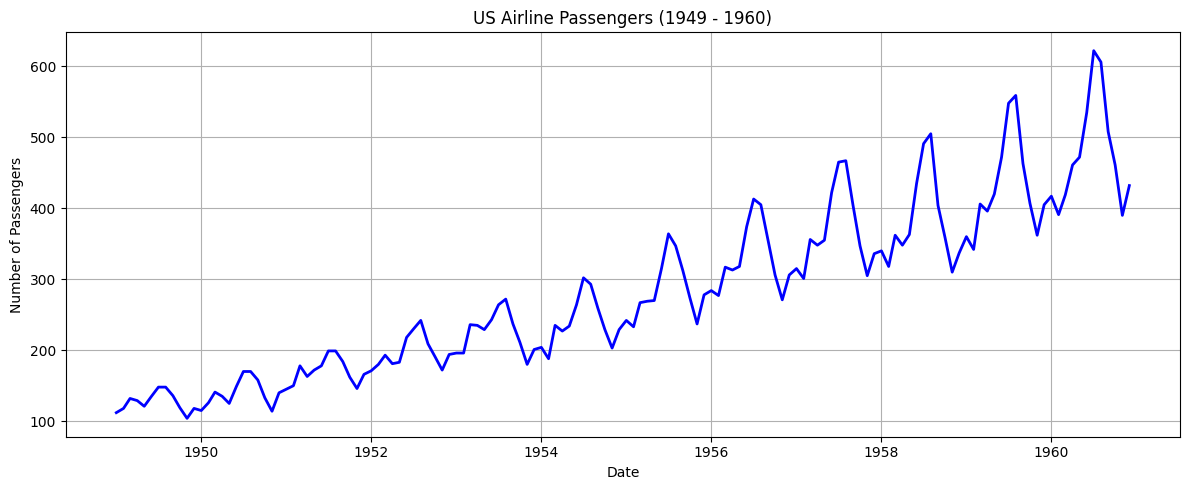

In [6]:
# Plotting function
def plot_time_series(df, x_column, y_column, title="Time Series Plot", xlabel="Date", ylabel="Value"):
    plt.figure(figsize=(12, 5))
    plt.plot(df[x_column], df[y_column], color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the data
plot_time_series(df,
                 x_column='Date',
                 y_column='Number of Passengers',
                 title='US Airline Passengers (1949 - 1960)',
                 xlabel='Date',
                 ylabel='Number of Passengers')

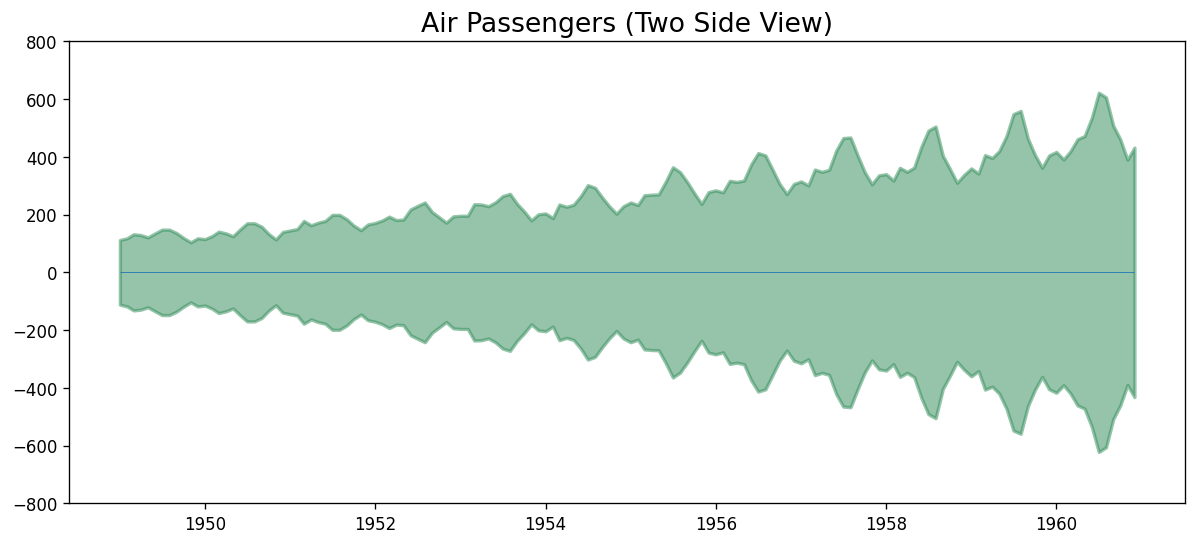

In [7]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

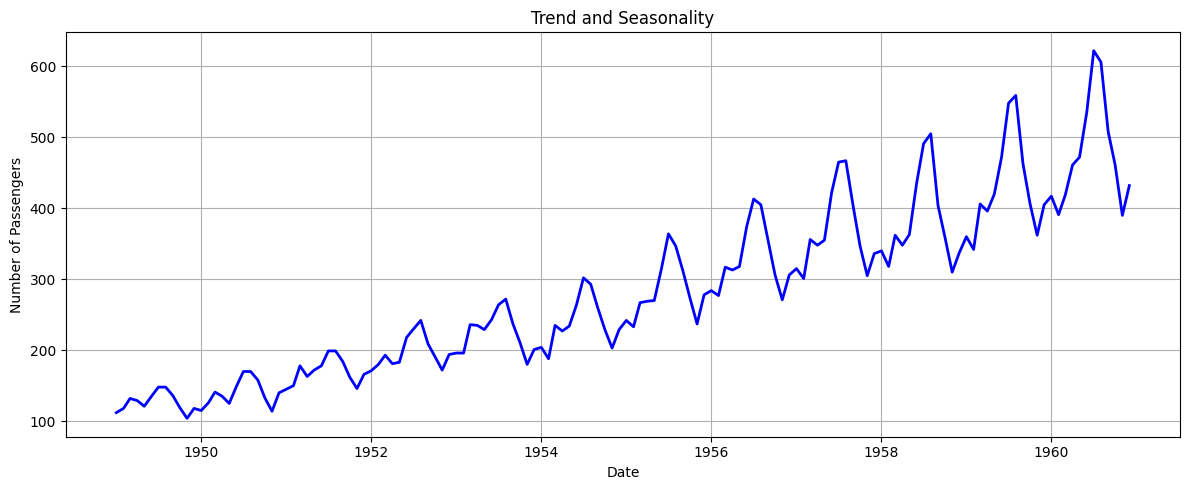

In [8]:
# Define a simple plotting function
def plot_time_series(df, date_col, value_col, title="Time Series Plot", xlabel="Date", ylabel="Value"):
    # Create a figure with defined size
    plt.figure(figsize=(12, 5))

    # Plot the data
    plt.plot(df[date_col], df[value_col], color='blue', linewidth=2)

    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add a grid for better readability
    plt.grid(True)

    # Adjust layout to prevent label clipping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function with your DataFrame and column names
plot_time_series(df, 
                 date_col='Date', 
                 value_col='Number of Passengers', 
                 title='Trend and Seasonality',
                 xlabel='Date', 
                 ylabel='Number of Passengers')

# Patterns in a Time Series 

# Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.

# Trend: A trend is observed when there is an increasing or decreasing slope observed in the time series.
# Seasonality: A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.

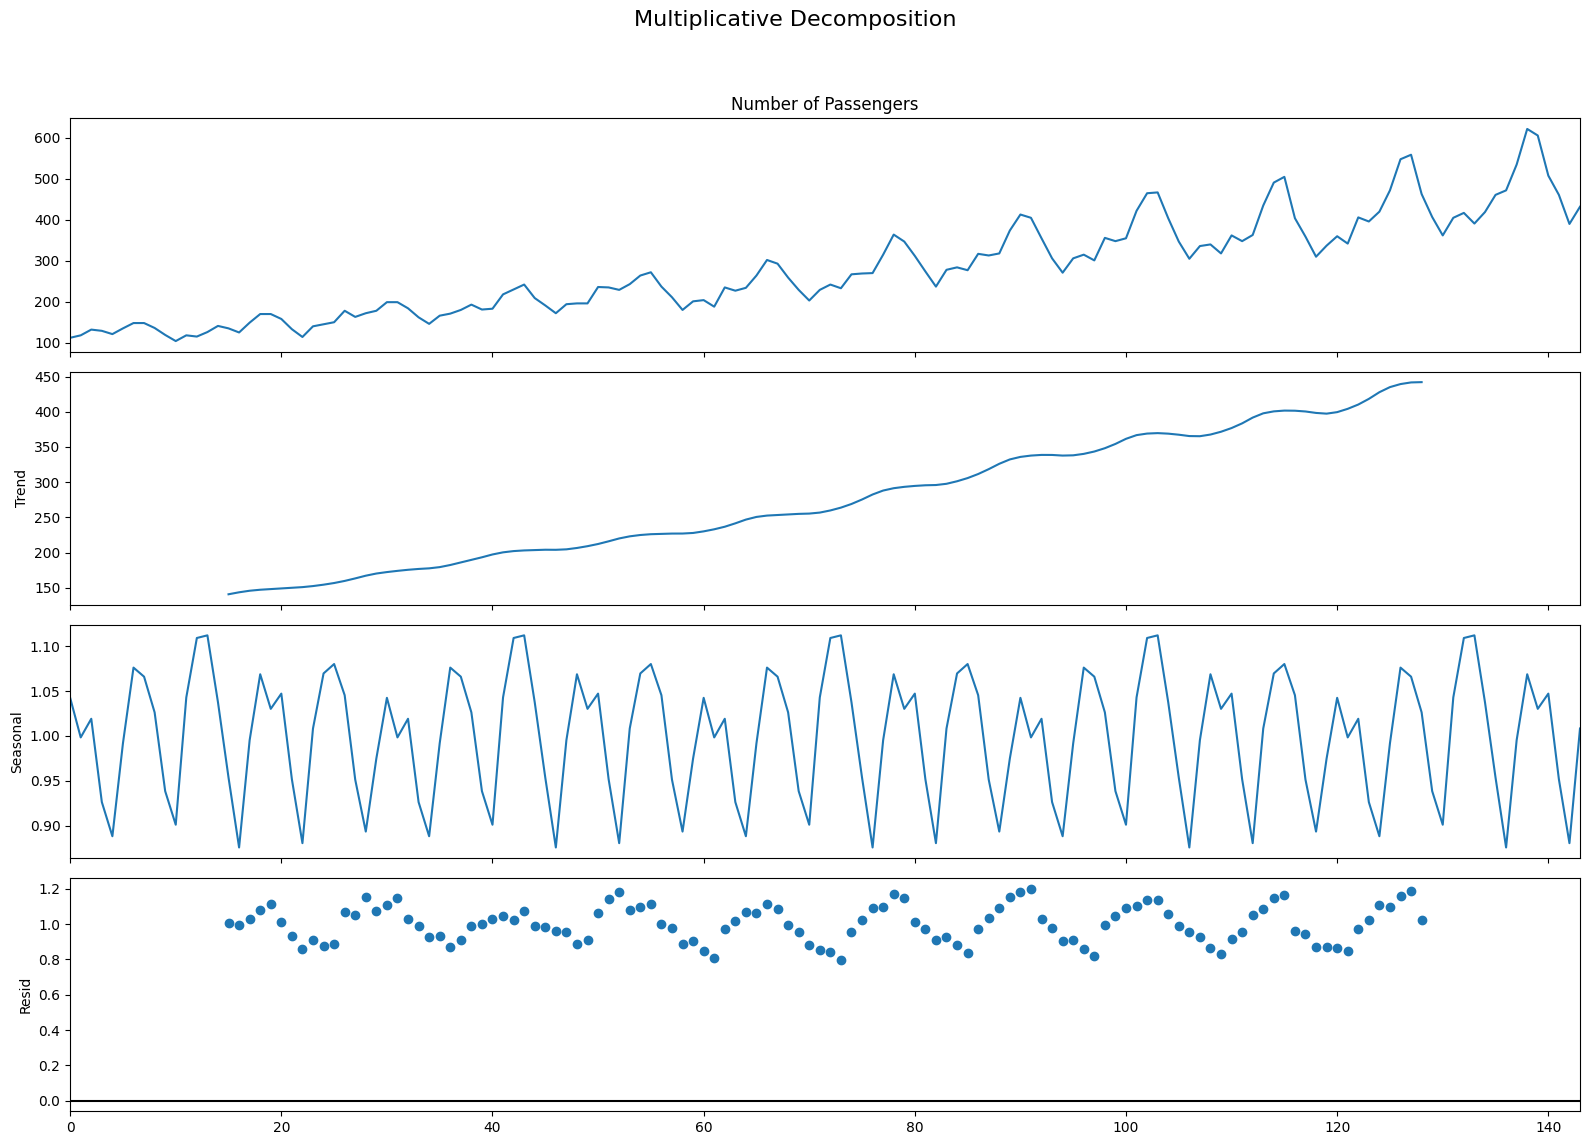

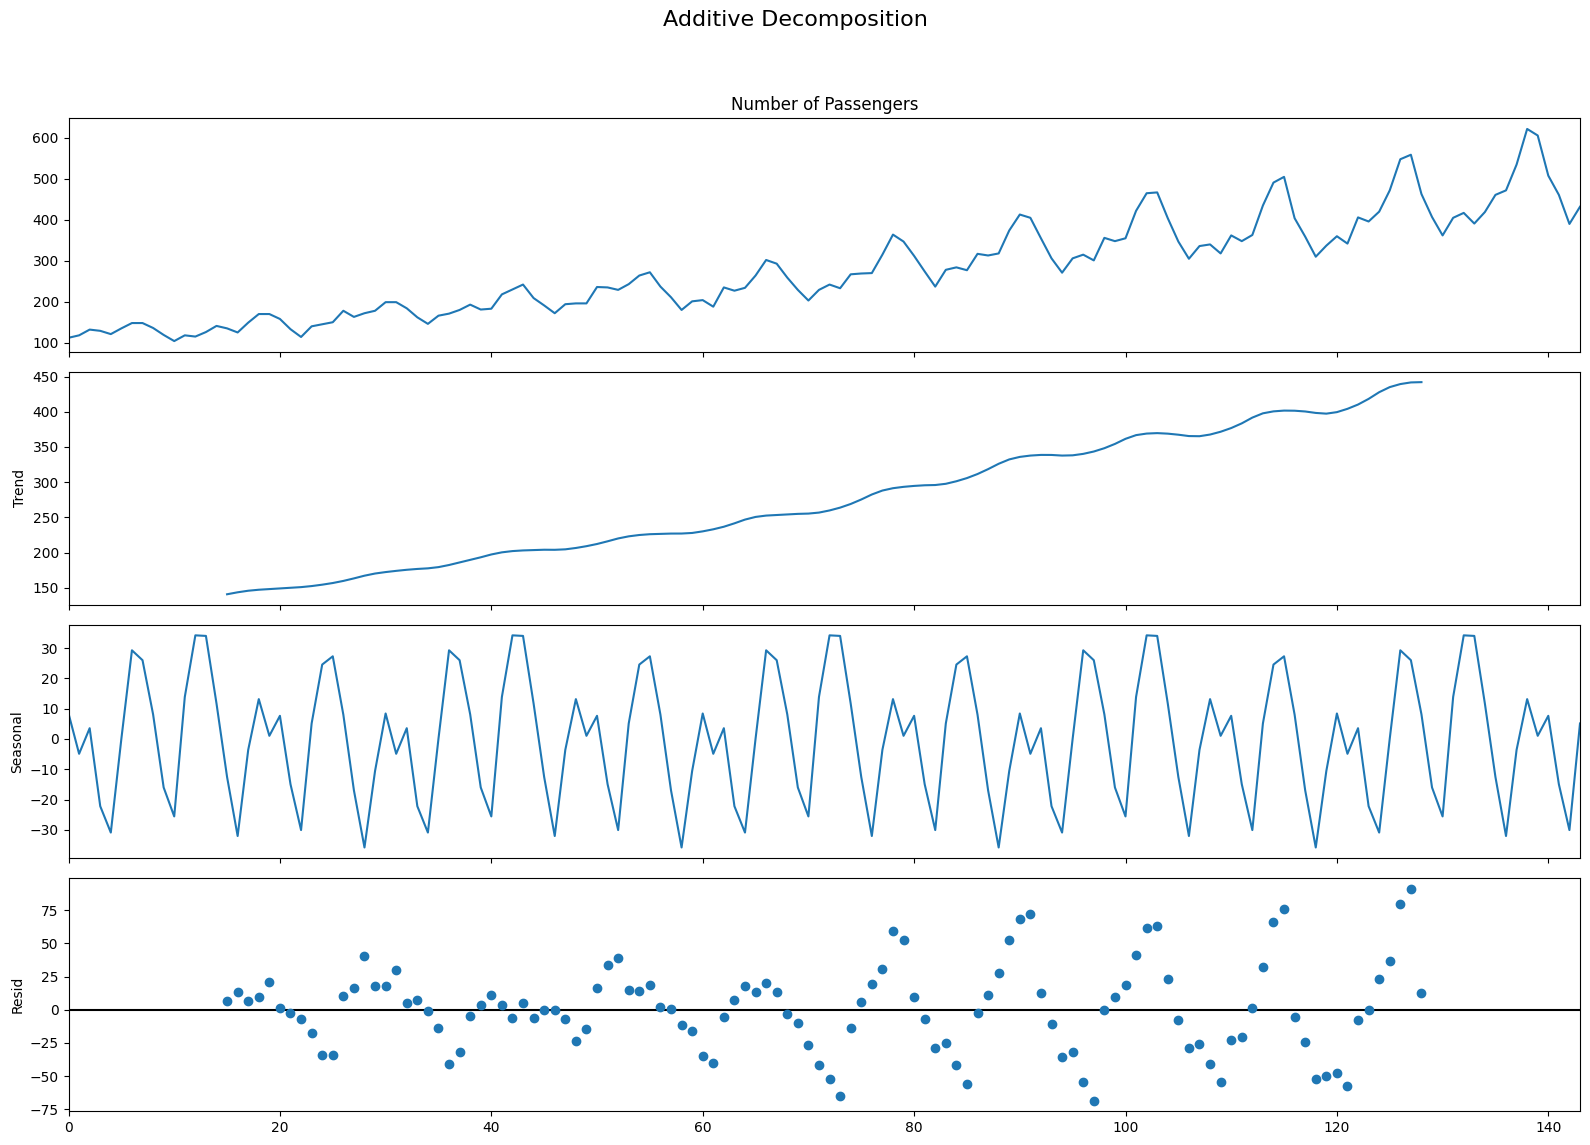

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Additive and Multiplicative Time Series 

# We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.
# Additive time series:
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Time Series:
# Value = Base Level x Trend x Seasonality x Error

# Decomposition of a Time Series 

# Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

<Axes: title={'center': 'Random White Noise'}>

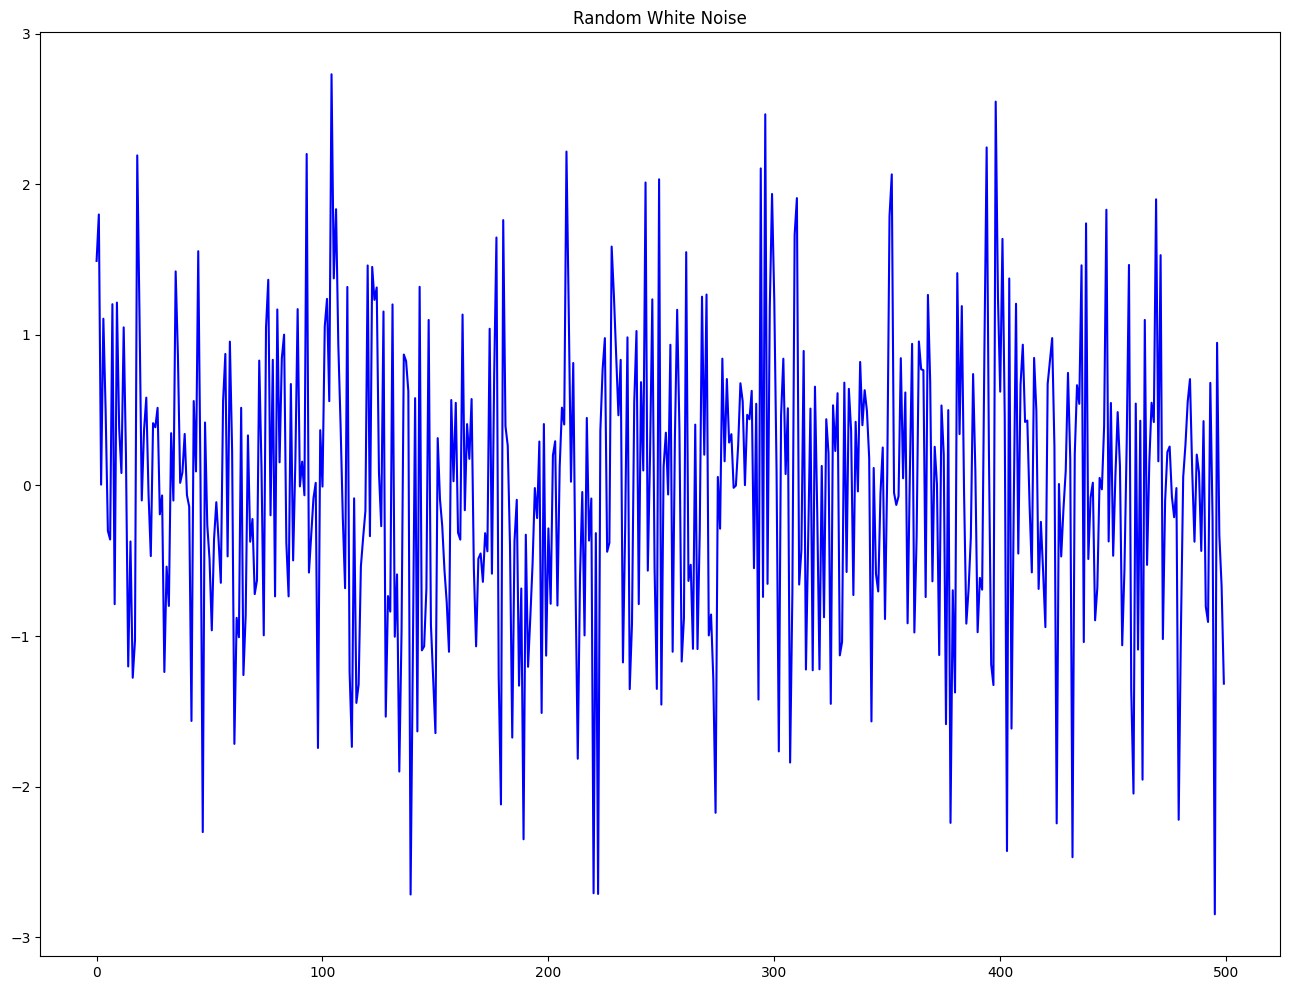

In [10]:
rand_numbers = np.random.randn(500)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')


# Stationary and Non-Stationary Time Series 

# Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time. Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time.

# How to make a time series stationary


# We can apply some sort of transformation to make the time-series stationary. These transformation may include:
# Differencing the Series (once or more)
# Take the log of the series
# Take the nth root of the series

# The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

# Introduction to Differencing 


# If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.
# If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.
# For example, consider the following series: [1, 5, 2, 12, 20]
# First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]
# Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]


# Reasons to convert a non-stationary series into stationary one before forecasting 

# Forecasting a stationary series is relatively easy and the forecasts are more reliable.
# An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

# How to test for stationarity? 

# The stationarity of a series can be checked by looking at the plot of the series.
# Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.


# There are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called Unit Root Tests. This test checks if a time series is non-stationary and possess a unit root.

# There are multiple implementations of Unit Root tests like:
# 1. Augmented Dickey Fuller test (ADF Test)

# 2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

# 3. Philips Perron test (PP Test)

# Augmented Dickey Fuller test (ADF Test):

# Augmented Dickey Fuller test or (ADF Test) is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.


# Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary):

# The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

# Philips Perron test (PP Test) 

# The Philips Perron or PP test is a unit root test. It is used in the time series analysis to test the null hypothesis that a time series is integrated of order 1. It is built on the ADF test discussed above.

# Difference between white noise and a stationary series 

# Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

# Mathematically, a sequence of completely random numbers with mean zero is a white noise.

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

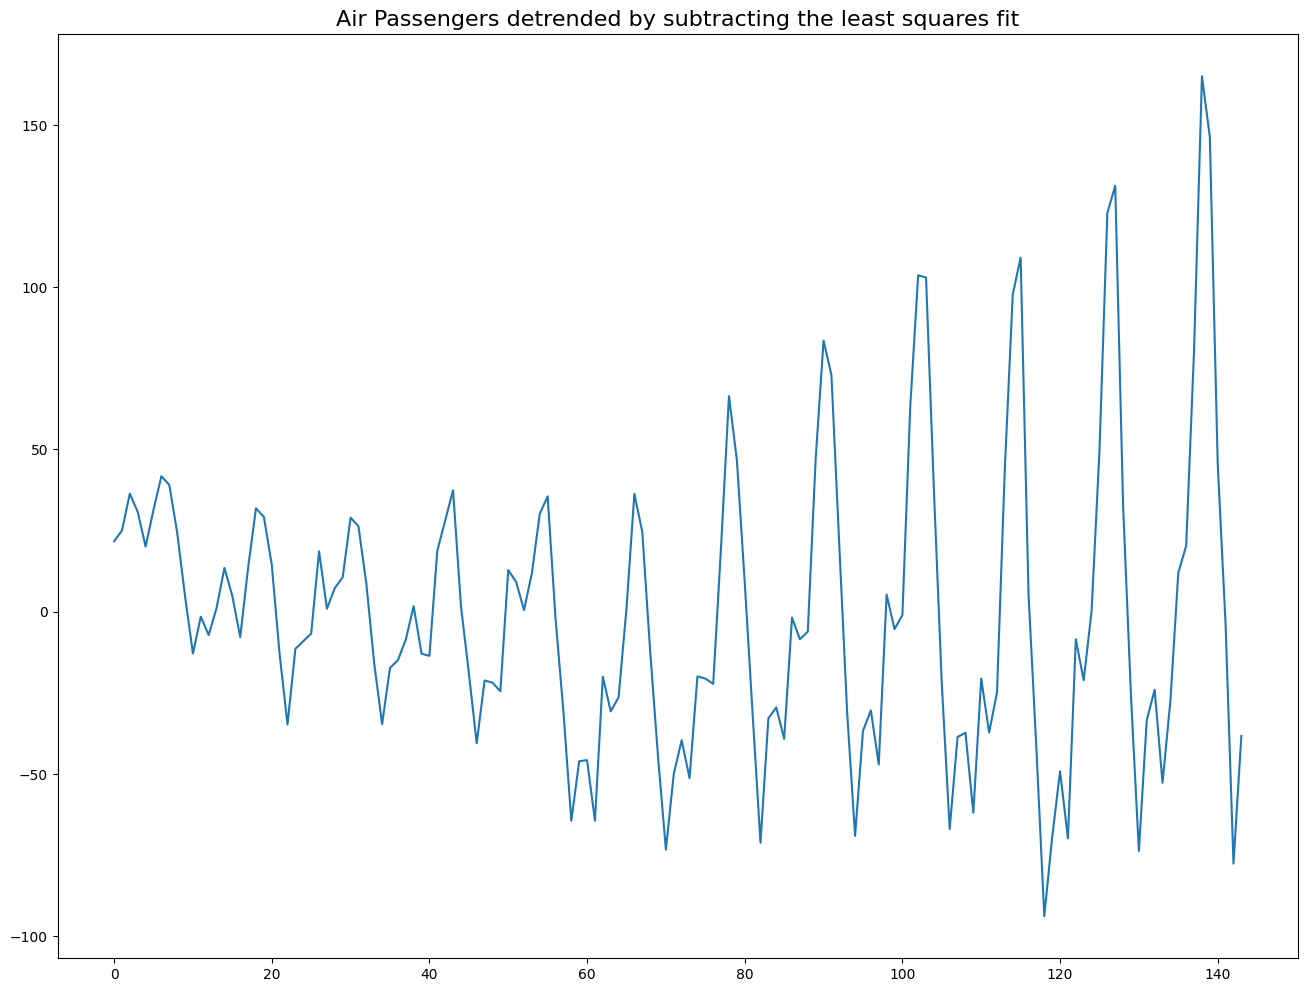

In [11]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

# Detrend a Time Series 

# Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:

# Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. 

# We subtract the trend component obtained from time series decomposition

# Subtract the mean.

# Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

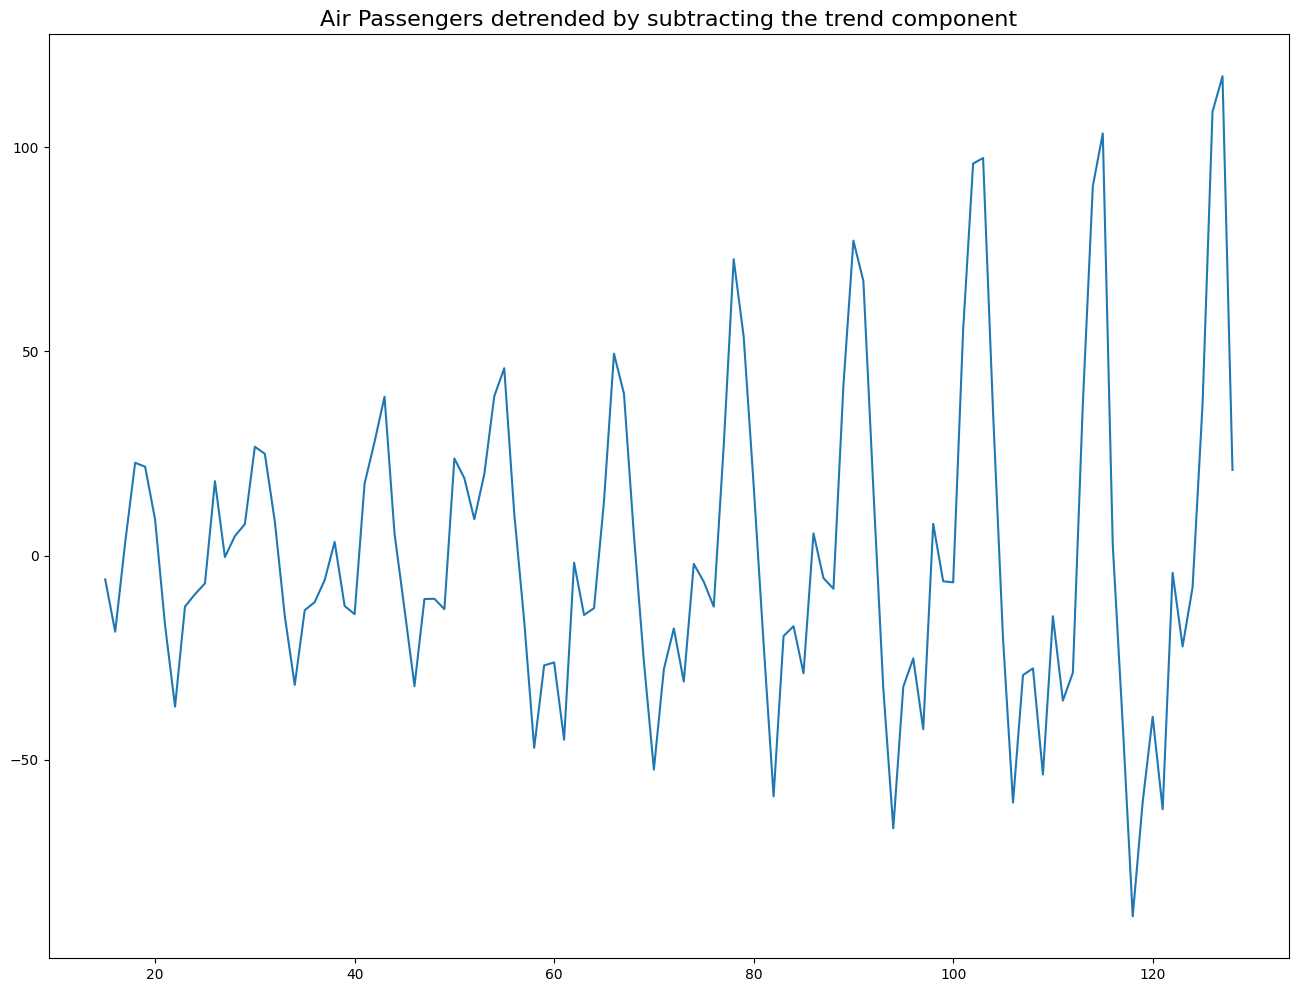

In [12]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

# Deseasonalize a Time Series 

# There are multiple approaches to deseasonalize a time series. These approaches are listed below:

# Take a moving average with length as the seasonal window. This will smoothen in series in the process.
# Seasonal difference the series (subtract the value of previous season from the current value).


[]

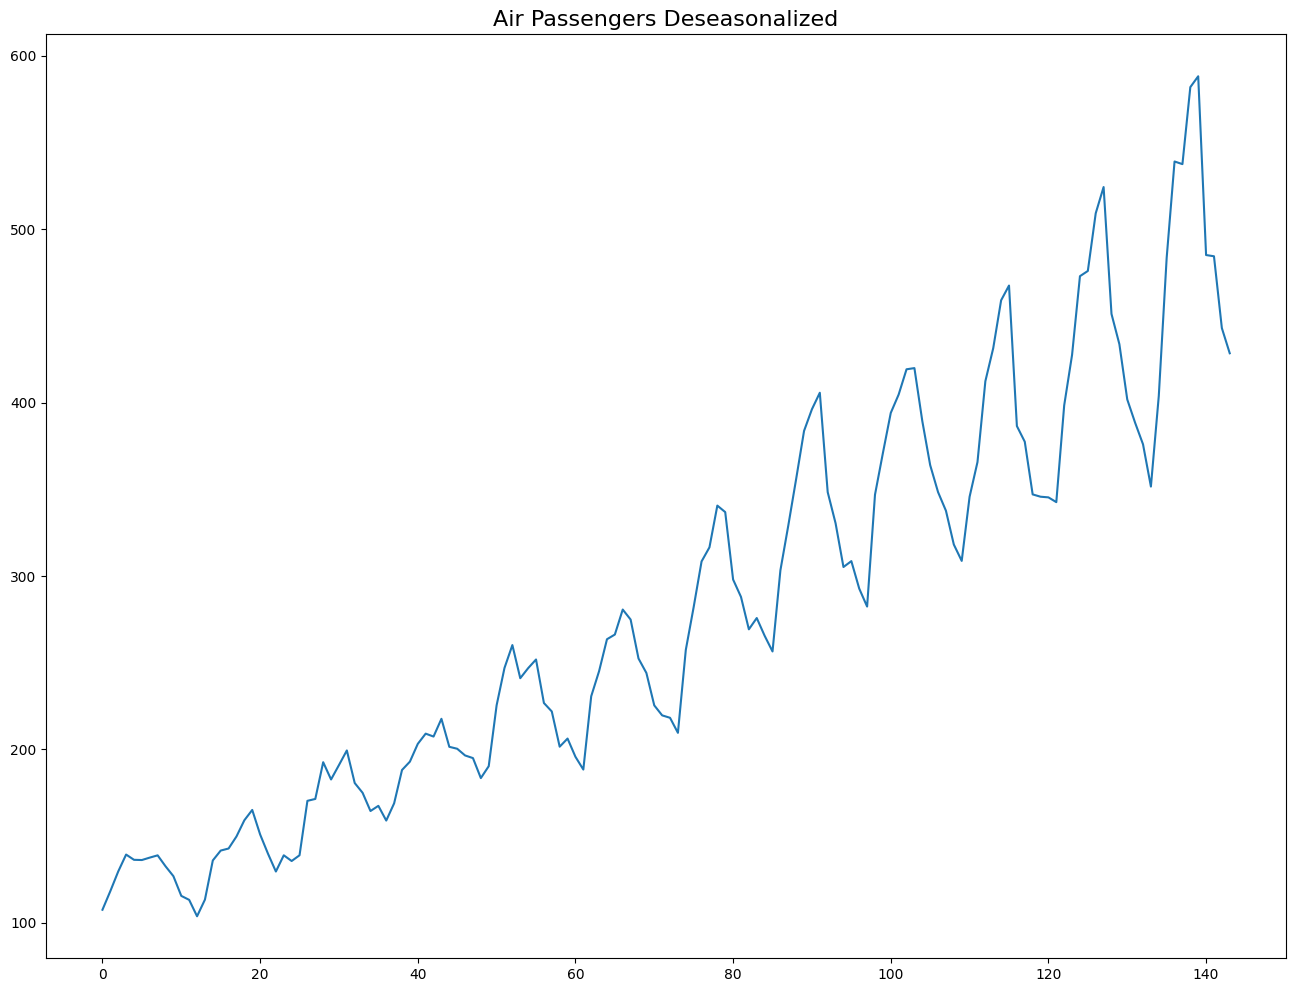

In [13]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

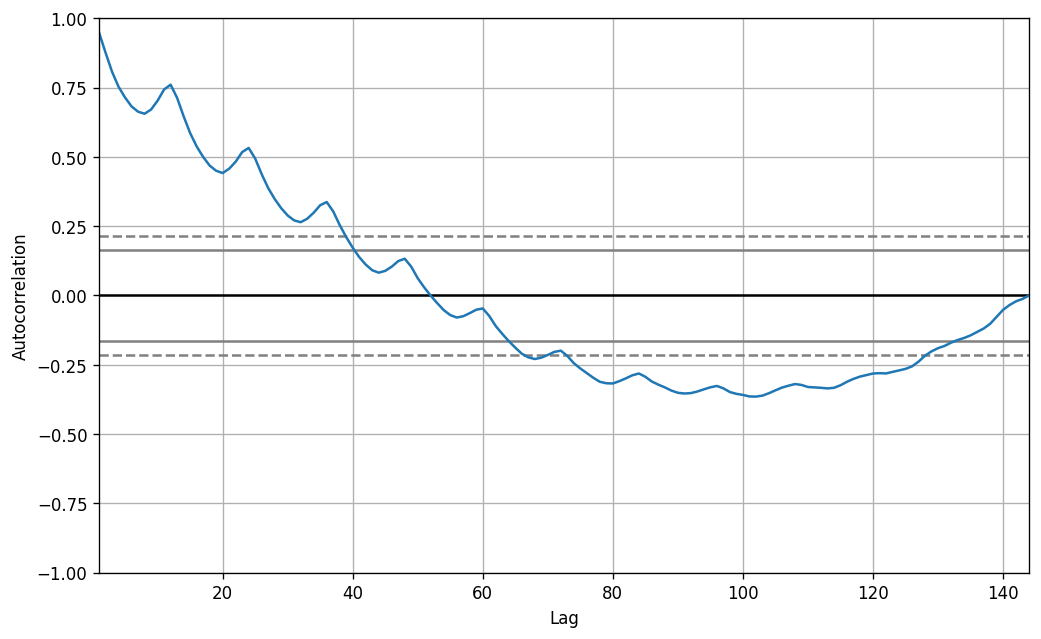

In [14]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

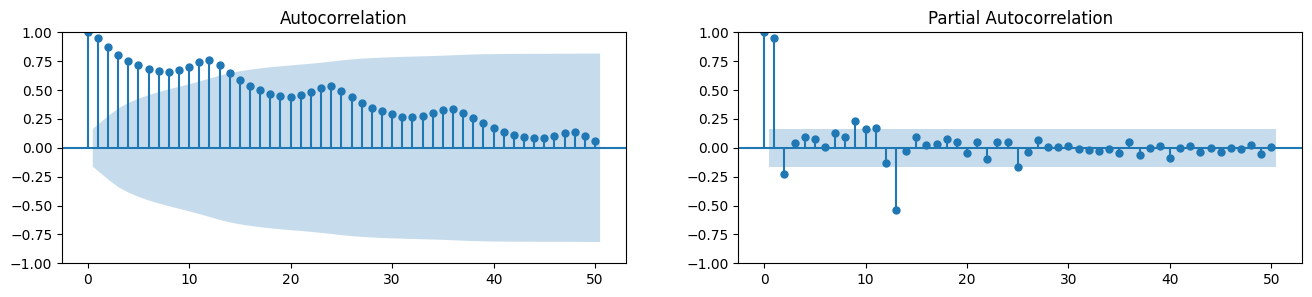

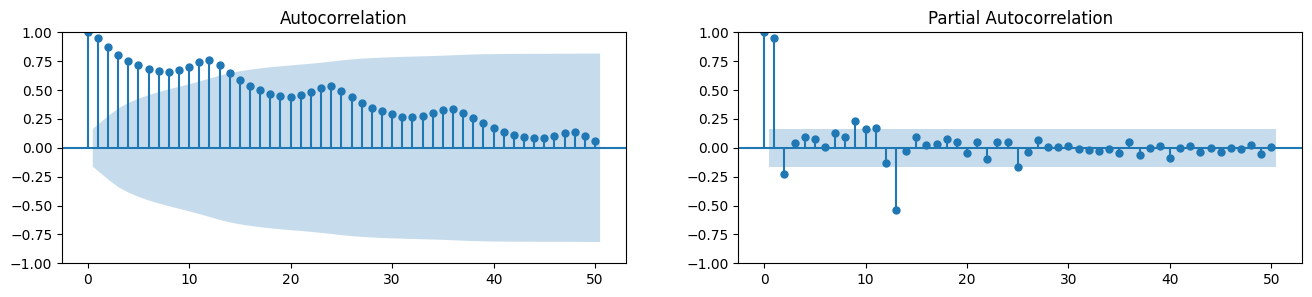

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

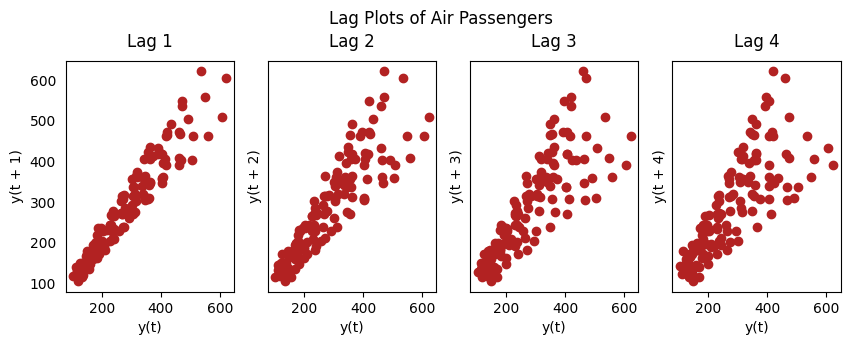

In [16]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()